In [37]:
# %matplotlib widget 
import pandas as pd
from torque_log_analysis import resample_data,drop_rows_from_df
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [38]:
# Open log
path = (r"C:\Users\Matthew Samson\Documents\formula\4_2_2024_KS7e First Shakedown\parsed-data")
# path = r"C:\Users\Matthew Samson\Downloads\OneDrive_1_4-4-2024"
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:/Users/Matthew Samson/Documents/formula/4_9_dyno_faults/parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\4_9_drivelineYeet\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\omni_test_log\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\4_13_ks7c_invitational\parsed-data")
# path = (r"C:\Users\Matthew Samson\Documents\formula\DATA_icCranking\parsed-data")


# path = (r"C:\Users\Matthew Samson\Documents\formula\10_16_23 Dyno day\240nm vehicle logs\parsed-data")
logs = {}
for filename in os.listdir(path):
            if filename.endswith('.csv') or filename.endswith('.CSV'):
                try:
                    file_path = os.path.join(path, filename)
                    # try:
                    df = pd.read_csv(file_path)
                                # Drop the first 50 rows
                    # df = df.drop(df.index[:10])
                    df['Time'] = pd.to_datetime(
                        df["Time"], unit='ms')  # Convert epoch time to datetime
                    df.set_index("Time", inplace=True)  # Set 'Time' as index
                    # df = drop_rows_from_df(df,"")
                    # Reset the index if you want
                    # df = df.reset_index(drop=True)
                    logs[filename] = df
                
                except:
                    print(f"Error with {filename}")
                    continue


Error with parseddata0004.CSV
Error with parseddata0005.CSV
Error with parseddata0006.CSV
Error with parseddata0007.CSV
Error with parseddata0008.CSV
Error with parseddata0009.CSV
Error with parseddata0013.CSV
Error with parseddata0016.CSV


In [39]:

for name,df in logs.items():
    print(list(df))

['tps', 'batt', 'afr1_old', 'afr2_old', 'warmcor', 'tpsaccel', 'tpsfuelcut', 'barocor', 'sensors1', 'sensors2', 'sensors3', 'sensors4', 'omni_fw_version', 'omni_on_time_seconds', 'omni_project_on_main', 'omni_project_is_dirty', 'omni_accel_x', 'omni_accel_y', 'omni_accel_z', 'omni_gyro_x', 'omni_gyro_y', 'omni_gyro_z', 'omni_heading', 'omni_pitch', 'omni_roll', 'omni_shockpot_fl', 'omni_shockpot_fr', 'omni_shockpot_rl', 'omni_shockpot_rr', 'omni_steering', 'omni_gps_latitude', 'omni_gps_longitude', 'seconds', 'pw1', 'pw2', 'rpm', 'adv_deg', 'squirt', 'engine', 'afrtgt1', 'afrtgt2', 'wbo2_en1', 'wbo2_en2', 'baro', 'map', 'mat', 'clt', 'sensors5', 'sensors6', 'sensors7', 'sensors8', 'fuel_press1', 'fuel_press2', 'fuel_temp1', 'fuel_temp2', 'AFR1', 'AFR2', 'AFR3', 'AFR4', 'AFR5', 'AFR6', 'AFR7', 'AFR8']
['tps', 'batt', 'afr1_old', 'afr2_old', 'warmcor', 'tpsaccel', 'tpsfuelcut', 'barocor', 'sensors1', 'sensors2', 'sensors3', 'sensors4', 'omni_fw_version', 'omni_on_time_seconds', 'omni_pro

In [40]:
import plotly.express as px
import pandas as pd

for name,df in logs.items():

    # df.dropna(
    #     axis=0,
    #     how='any',
    #     thresh=None,
    #     subset=None,
    #     inplace=True
    # )

    color_scale = [(0, 'orange'), (1,'red')]

    fig = px.scatter_mapbox(df, 
                            lat="omni_gps_latitude", 
                            lon="omni_gps_longitude", 
                            color_continuous_scale=color_scale,
                            zoom=8, 
                            height=800,
                            width=800)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    break

In [41]:
for name,df in logs.items():
    joedf = df[['omni_gps_latitude','omni_gps_longitude']]
    joedf = joedf.dropna()
    print(joedf)

                         omni_gps_latitude  omni_gps_longitude
Time                                                          
2024-04-12 11:05:29.006           0.000000            0.000000
2024-04-12 11:05:29.102           0.000000            0.000000
2024-04-12 11:05:30.194           0.000000            0.000000
2024-04-12 11:05:30.293           0.000000            0.000000
2024-04-12 11:05:30.394          -1.316667           -0.833333
...                                    ...                 ...
2024-04-12 11:06:17.794           0.000000            0.000000
2024-04-12 11:06:17.894           0.000000            0.000000
2024-04-12 11:06:17.994           0.000000            0.000000
2024-04-12 11:06:18.094           0.000000            0.000000
2024-04-12 11:06:18.195           0.000000            0.000000

[460 rows x 2 columns]
                         omni_gps_latitude  omni_gps_longitude
Time                                                          
2024-04-12 11:05:29.007        

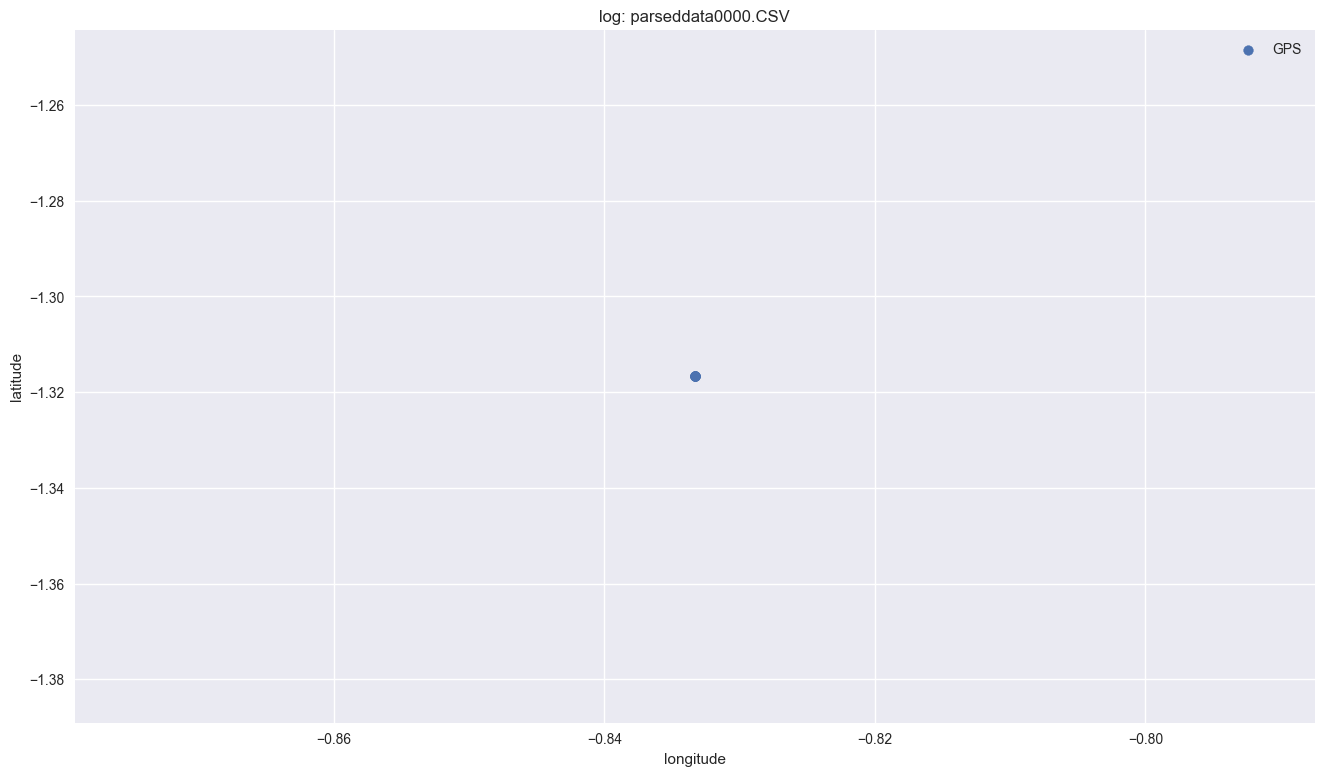

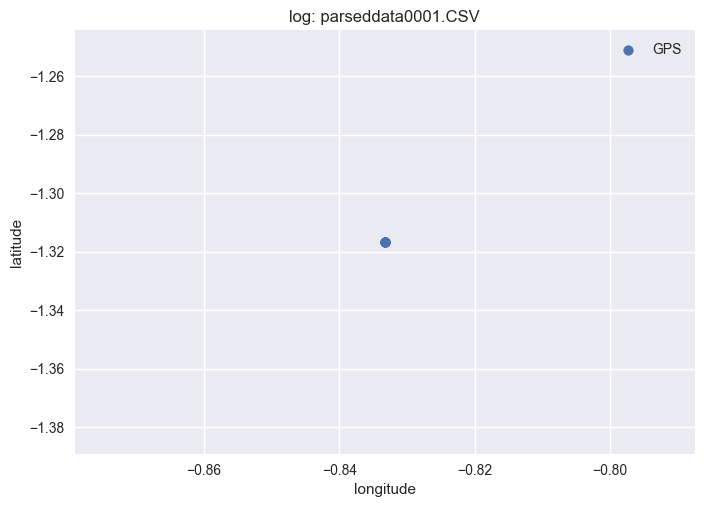

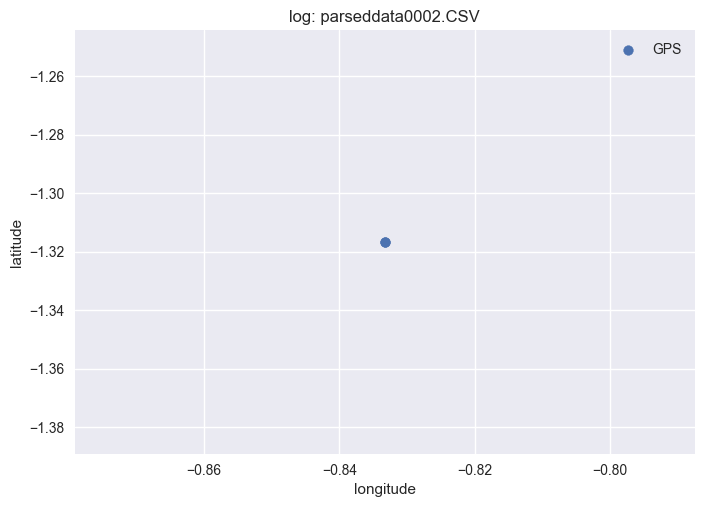

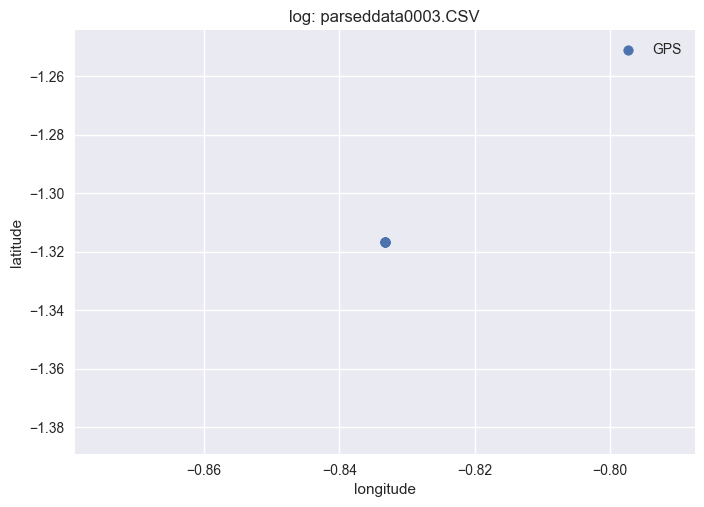

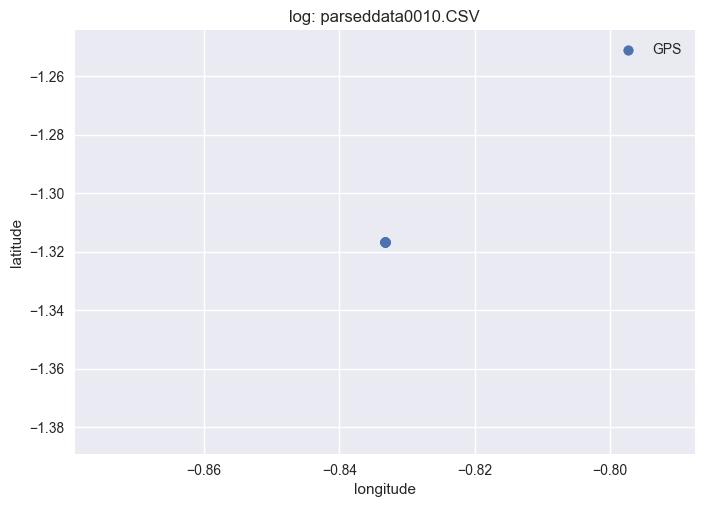

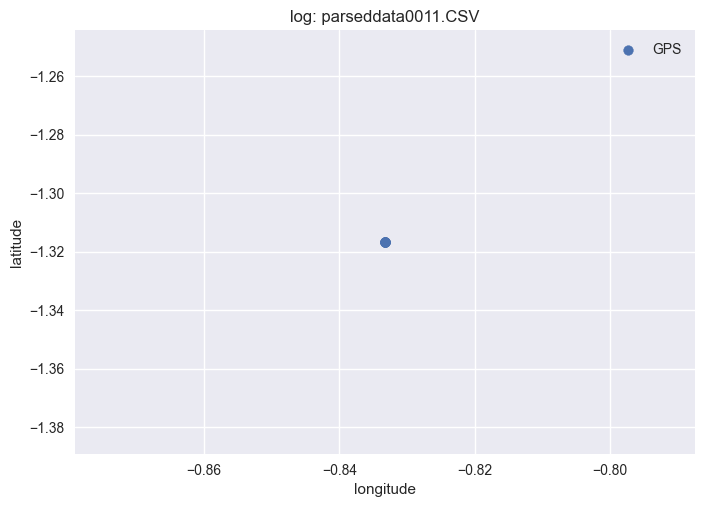

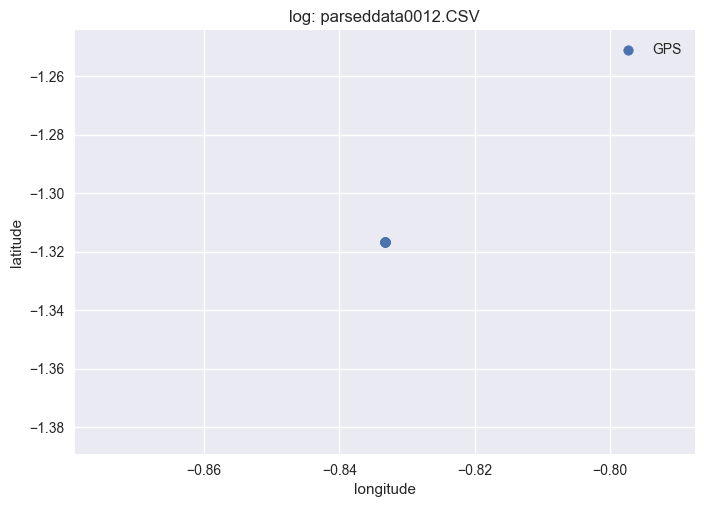

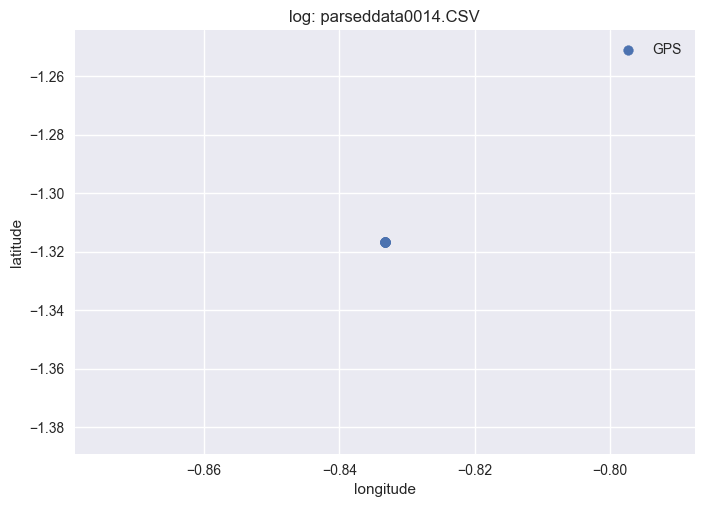

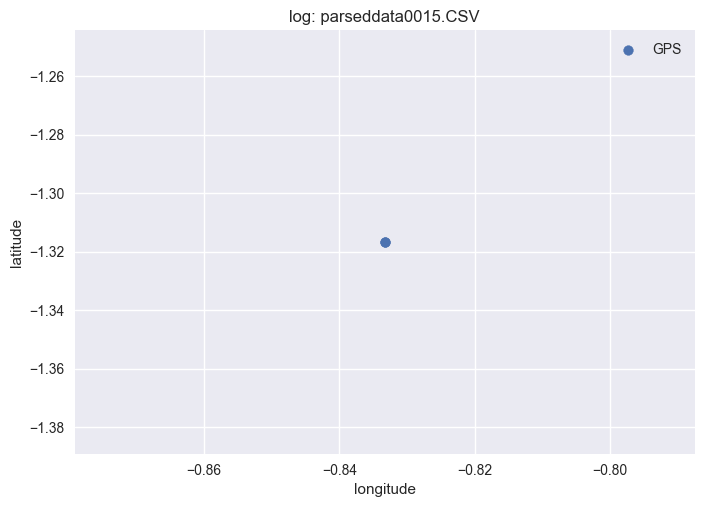

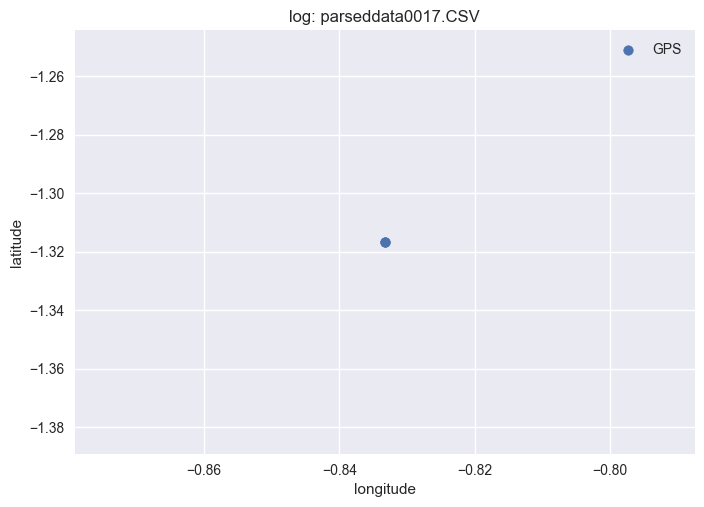

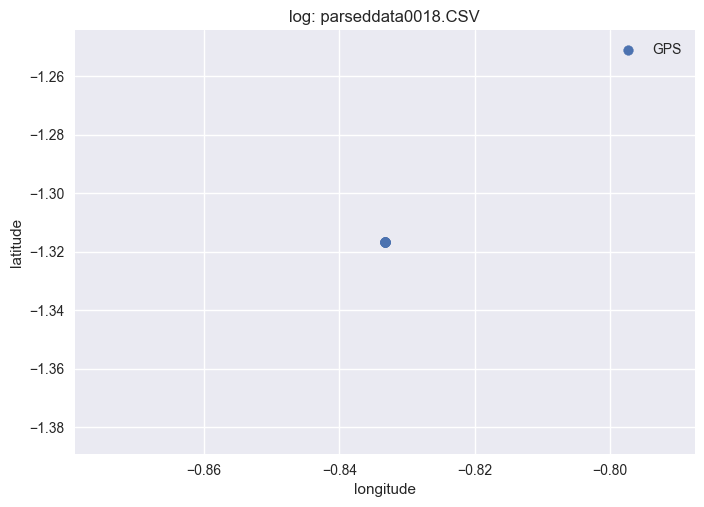

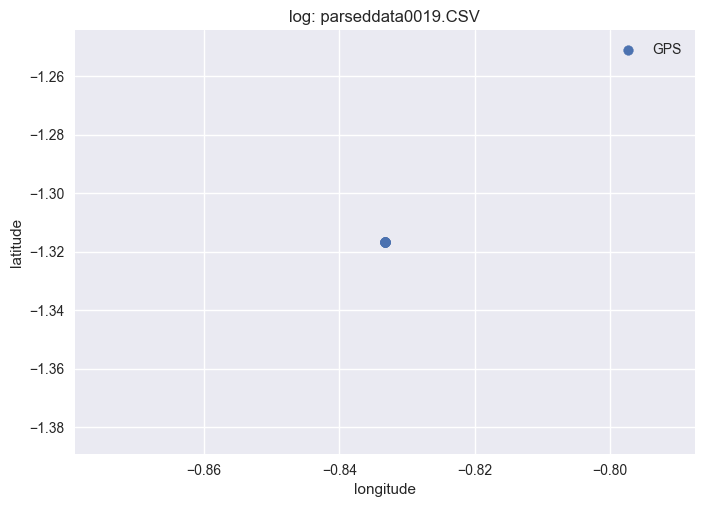

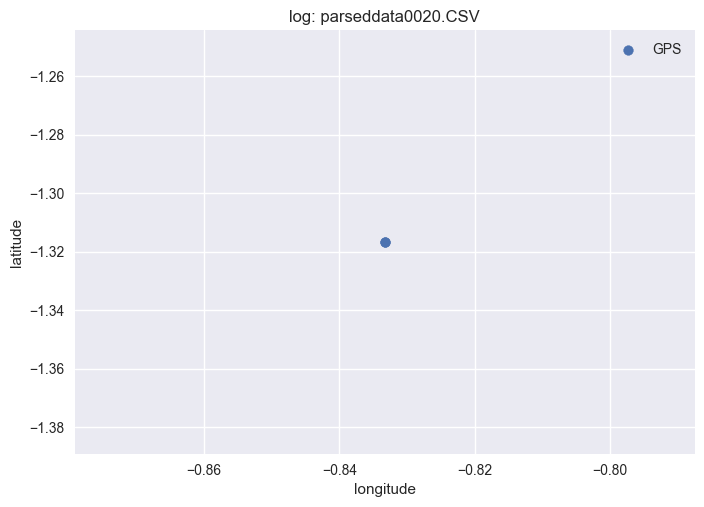

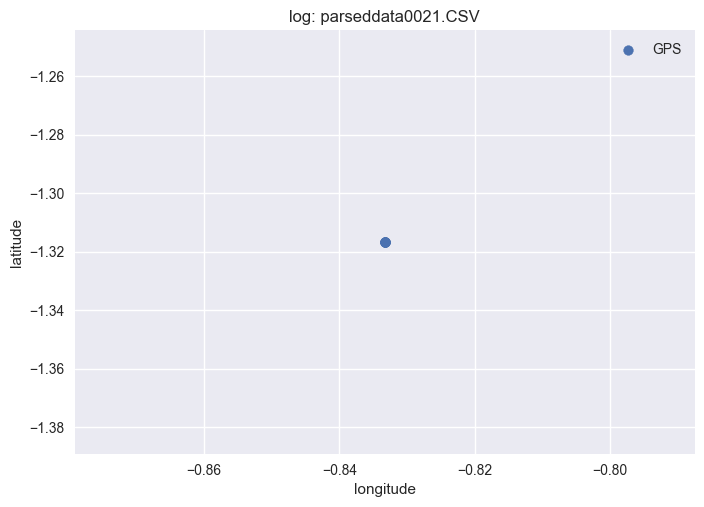

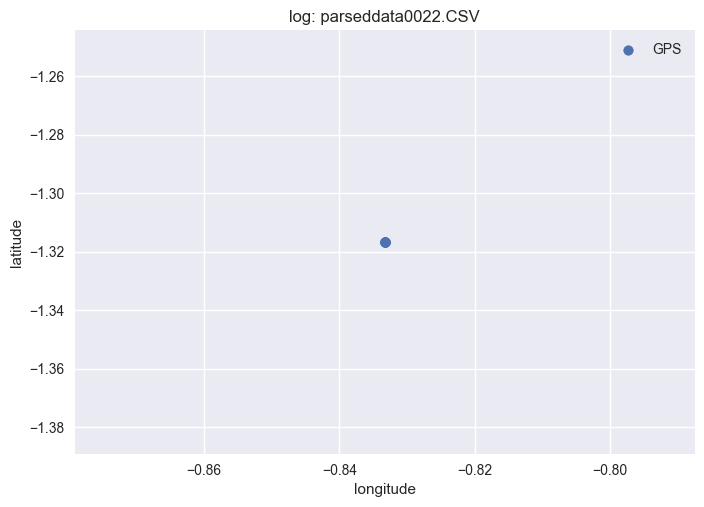

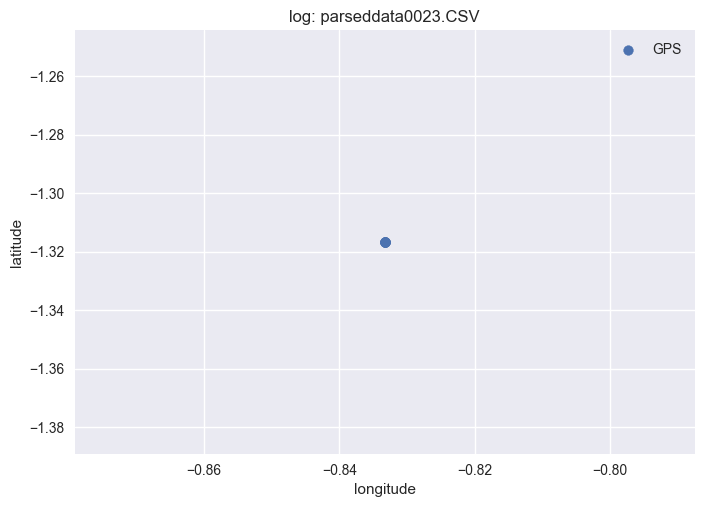

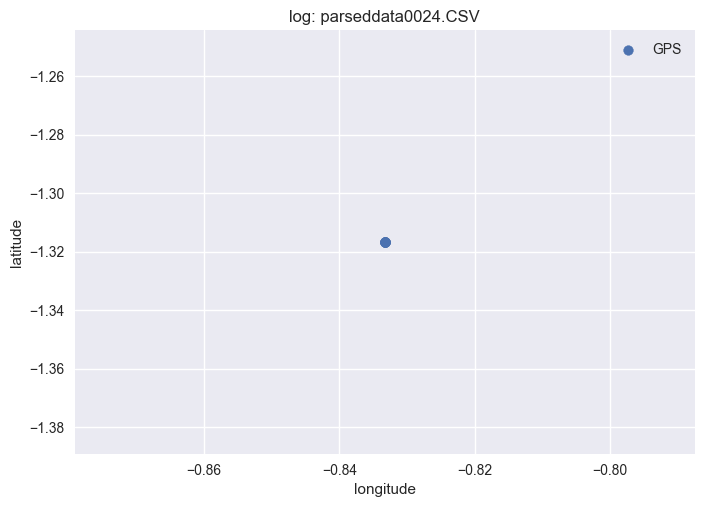

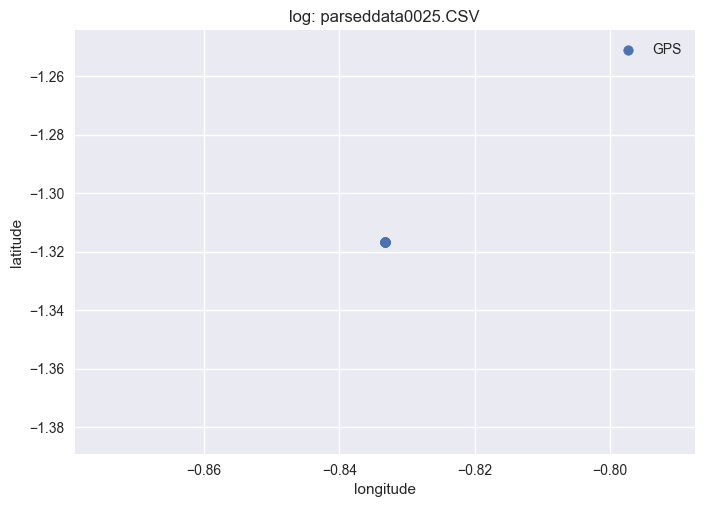

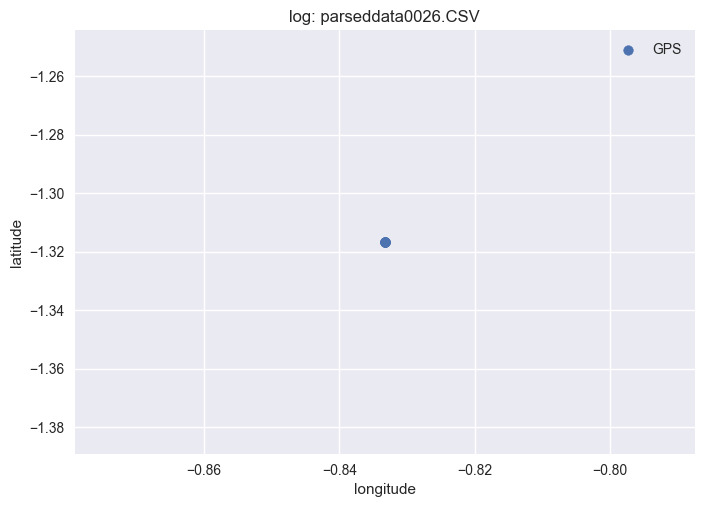

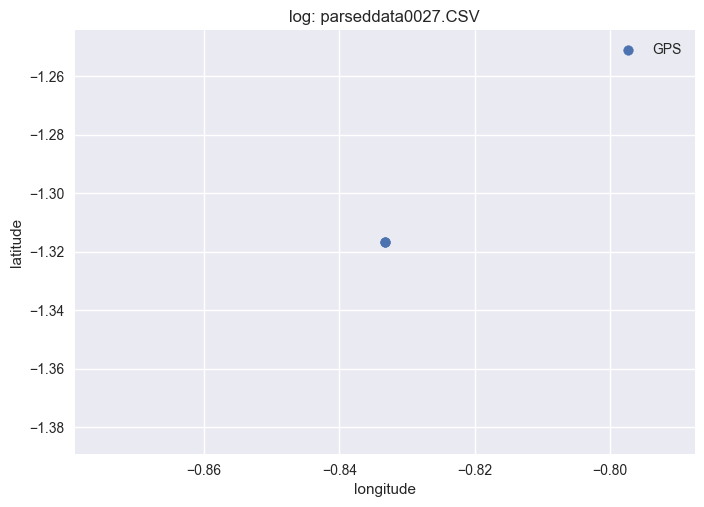

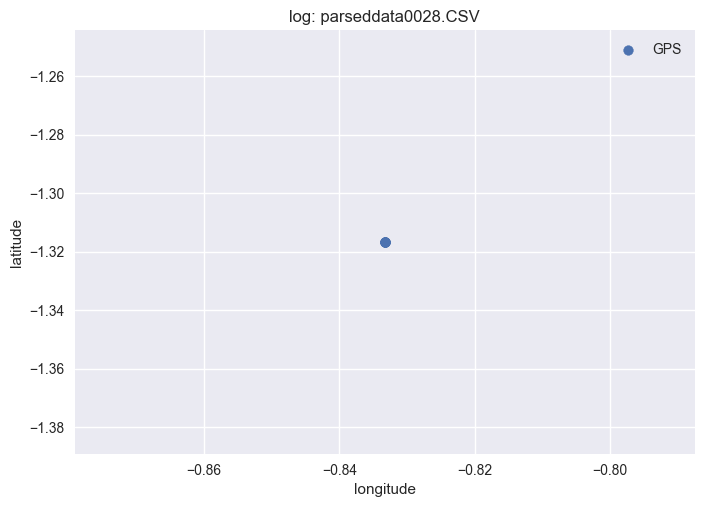

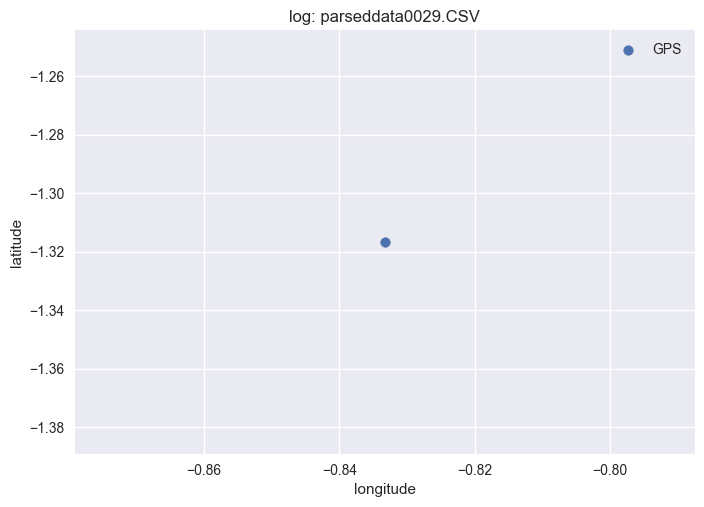

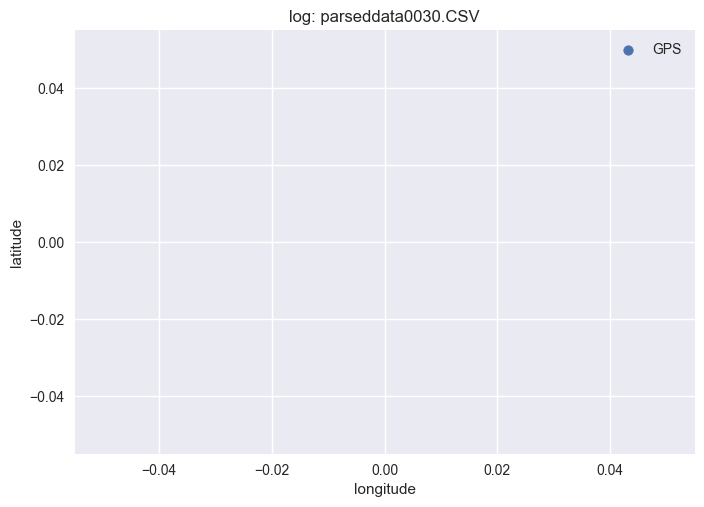

In [ ]:
plt.figure(figsize=(16,9))

for name,df in logs.items():
    plt.title(f"log: {name}")
    plt.scatter(df['omni_gps_longitude'][df['omni_gps_longitude']!=0],df['omni_gps_latitude'][df['omni_gps_latitude']!=0],label=f'GPS')

    plt.grid(True)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.legend()
    plt.show()

Time
2024-04-12 11:50:36.001     0.000
2024-04-12 11:50:36.003     0.002
2024-04-12 11:50:36.004     0.003
2024-04-12 11:50:36.006     0.005
2024-04-12 11:50:36.008     0.007
                            ...  
2024-04-12 11:52:04.862    88.861
2024-04-12 11:52:04.863    88.862
2024-04-12 11:52:04.864    88.863
2024-04-12 11:52:04.865    88.864
2024-04-12 11:52:04.866    88.865
Name: elapsed_time, Length: 69232, dtype: float64
                         tps  batt  afr1_old  afr2_old  warmcor  tpsaccel  \
Time                                                                        
2024-04-12 11:50:36.001  NaN   NaN       NaN       NaN     10.0       0.0   
2024-04-12 11:50:36.003  NaN   NaN       NaN       NaN      NaN       NaN   
2024-04-12 11:50:36.004  NaN   NaN       NaN       NaN      NaN       NaN   
2024-04-12 11:50:36.006  NaN   NaN       NaN       NaN      NaN       NaN   
2024-04-12 11:50:36.008  NaN   NaN       NaN       NaN      NaN       NaN   
...                      ...   .

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



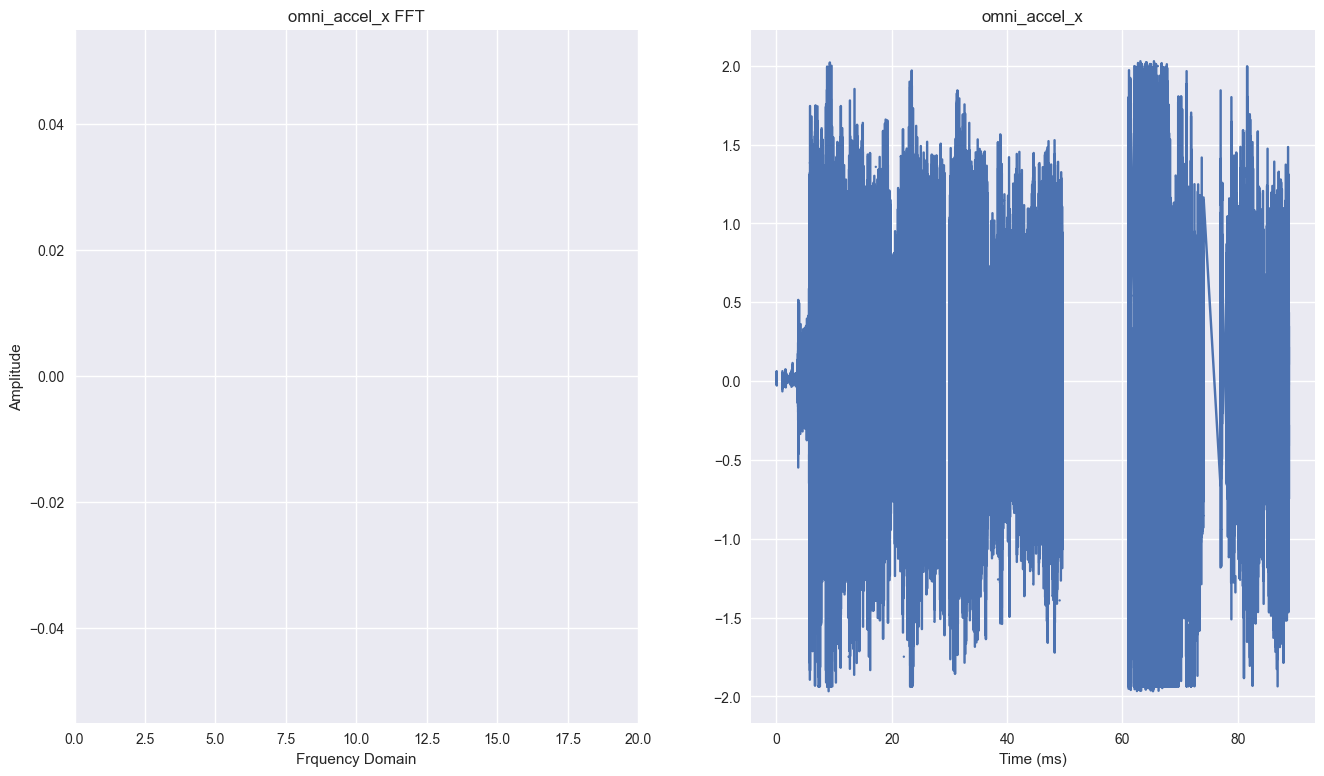

Time
2024-04-12 11:50:36.001      NaN
2024-04-12 11:50:36.003    0.125
2024-04-12 11:50:36.004      NaN
2024-04-12 11:50:36.006      NaN
2024-04-12 11:50:36.008    0.124
                           ...  
2024-04-12 11:52:04.862      NaN
2024-04-12 11:52:04.863    0.474
2024-04-12 11:52:04.864   -0.159
2024-04-12 11:52:04.865    0.309
2024-04-12 11:52:04.866    0.803
Name: omni_accel_y, Length: 69232, dtype: float64
88.865
0.0


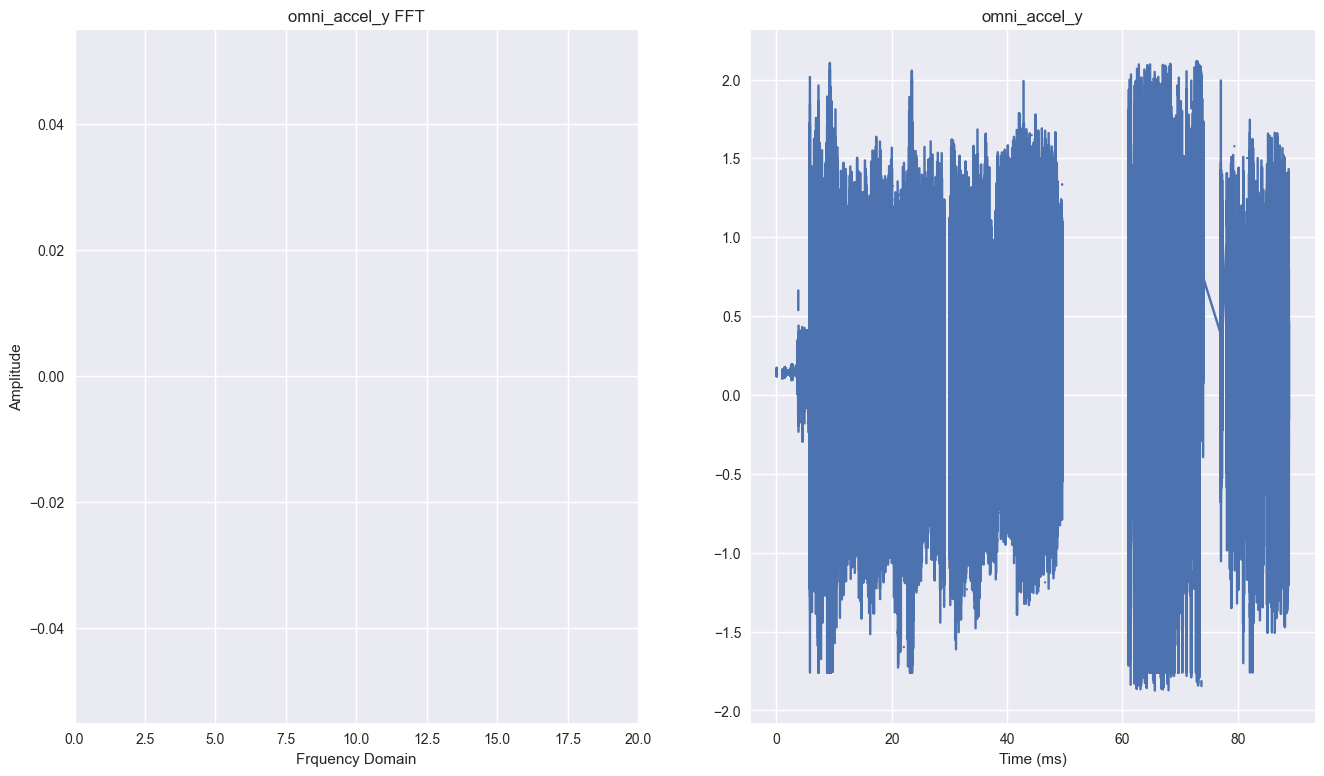

Time
2024-04-12 11:50:36.001      NaN
2024-04-12 11:50:36.003    1.025
2024-04-12 11:50:36.004      NaN
2024-04-12 11:50:36.006      NaN
2024-04-12 11:50:36.008    1.015
                           ...  
2024-04-12 11:52:04.862      NaN
2024-04-12 11:52:04.863    1.075
2024-04-12 11:52:04.864    1.114
2024-04-12 11:52:04.865    0.625
2024-04-12 11:52:04.866    0.628
Name: omni_accel_z, Length: 69232, dtype: float64
88.865
0.0


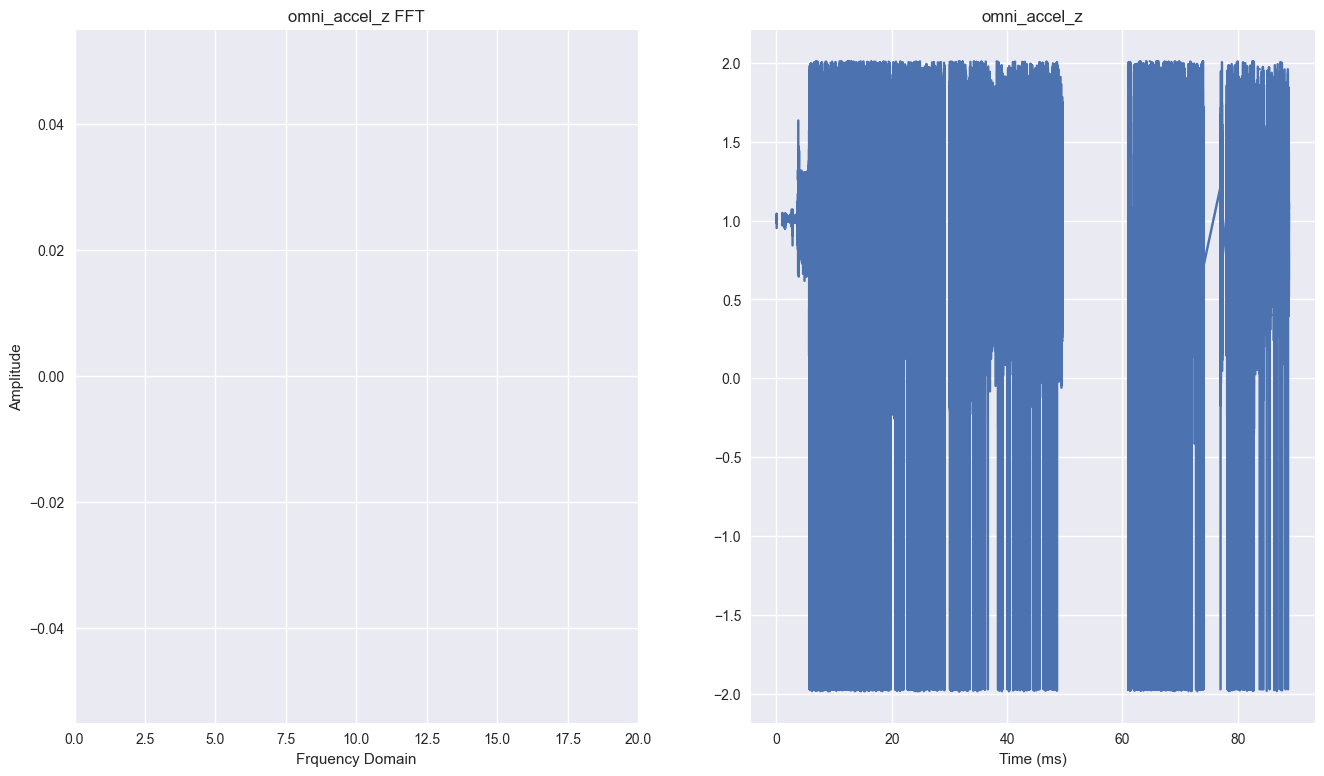

In [55]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.fft import fftfreq 
def convert_to_elapsed_time(df):
    df['elapsed_time'] = (df.index - df.index[0]).total_seconds()
    return df
for name,df in logs.items():
    if '19' in name:
        df = convert_to_elapsed_time(df)
        print(df['elapsed_time'])
        for col in ['omni_accel_x','omni_accel_y','omni_accel_z']:
            t = df["elapsed_time"].loc[df["omni_accel_x"] != None]
            s = df[col]

            fft = np.fft.fft(s)
            fft[0] = 0
            fftfreq = np.fft.fftfreq(len(s))*len(s)/(t.max()-t.min())
            plt.figure(figsize=(16,9))
            plt.subplot(1, 2, 1)
            plt.xlabel("Frquency Domain")
            plt.ylabel("Amplitude")
            plt.title(col+ " FFT")
            # plt.grid(True)
            # plt.ylim((0,2500))
            # plt.xscale('log')
            plt.xlim((0,20))

            plt.plot(fftfreq, fft)
            plt.subplot(1, 2, 2)
            plt.plot(t, s)
            plt.title(col)
            plt.xlabel("Time (ms)")

            plt.show()
    else:
        continue

In [ ]:

plt.figure(figsize=(16,9))

for name,df in logs.items():
    if '19' in name:
        plt.title(f"log: {name}")
        plt.scatter(df.index,df['omni_accel_x'],label=f'ACCEL X')
        plt.scatter(df.index,df['omni_accel_y'],label=f'ACCEL Y')
        plt.scatter(df.index,df['omni_accel_z'],label=f'ACCEL Z')
        plt.scatter(df.index,df['rpm'])

        plt.grid(True)
        plt.xlabel("Time")
        plt.legend()
        plt.show()
        
        plt.title(f"log: {name}")

        plt.scatter(df.index,df['omni_heading'],label=f'heading')
        plt.scatter(df.index,df['omni_pitch'],label=f'pitch')
        plt.scatter(df.index,df['omni_roll'],label=f'roll ')

        plt.grid(True)
        plt.xlabel("Time")
        plt.legend()
        plt.show()
    else:
        continue


<Figure size 1600x900 with 0 Axes>

In [ ]:
print(logs.keys())

dict_keys([])
